In [79]:
import pandas as pd
import numpy as np

In [80]:
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\50_Startups.csv')

In [82]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [84]:
states = pd.get_dummies(df['State'])

In [85]:
states.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [86]:
df = pd.concat([df,states],axis=1)
df.drop(['State'],axis=1,inplace=True)

In [87]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [88]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            

df = df.apply(normalize)

In [89]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

In [90]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend',
       'California', 'Florida', 'New York']]
Y = df['Profit']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [49]:
#from sklearn.linear_model import LinearRegression
#lm = LinearRegression()
#lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
import statsmodels.api as sm          
X_train = sm.add_constant(X_train)    
lm_1 = sm.OLS(Y_train,X_train).fit()

In [93]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           3.91e-21
Time:                        11:47:02   Log-Likelihood:                 62.390
No. Observations:                  40   AIC:                            -112.8
Df Residuals:                      34   BIC:                            -102.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1245      0.022     

In [94]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [95]:
vif_cal(input_data=df, dependent_col="Profit")

,Var,Vif
4,Florida,4.73
5,New York,4.38
3,California,4.15
0,R&D Spend,2.50
2,Marketing Spend,2.42
1,Administration,1.18


In [96]:
X_test = sm.add_constant(X_test)
Y_pred = lm_1.predict(X_test)

In [101]:
Y_test.head()

28    0.498934
11    0.729686
10    0.740175
41    0.355430
2     0.993178
Name: Profit, dtype: float64

In [98]:
Y_pred.head()

28    0.497430
11    0.663929
10    0.663172
41    0.322641
2     0.922715
dtype: float64

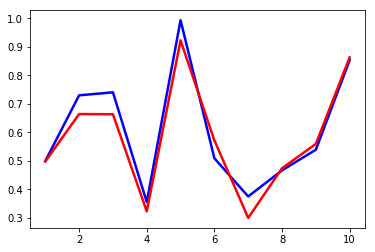

In [103]:
c = [i for i in range(1,11,1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")     
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-")  
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Profit', fontsize=16) 

Text(0, 0.5, 'ytest-ypred')

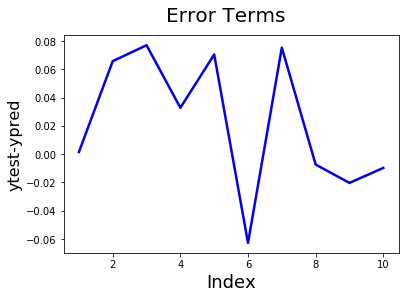

In [106]:
fig = plt.figure()
c = [i for i in range(1,11,1)]
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('ytest-ypred', fontsize=16)   

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Index')

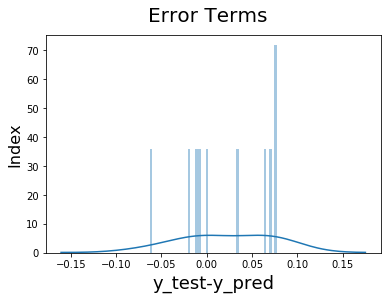

In [109]:
import seaborn as sns
fig = plt.figure()
sns.distplot((Y_test-Y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                   
plt.xlabel('y_test-y_pred', fontsize=18)                  
plt.ylabel('Index', fontsize=16) 

In [111]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE : 0.05145831752291046
